In [1]:
!pip install spotipy


In [2]:
!pip install pandas

In [3]:
#Operaciones matematicas, graficos y visualizacion de datos
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo

**Paso 1: Acceder a la API de Spotify**

Lo primero que se debe realizar es obtener las credenciales para acceder a la API de [Spotify](https://open.spotify.com/) que nos permitirá extraer data de la plataforma. Para ello es necesario crearse una cuenta en [Spotify for Developers](https://developer.spotify.com/dashboard/) y darle al botón verde \"Create an app\". Luego se le da click a la app creada y se usarán las credenciales.
 


In [5]:
client_id = "b94b318bdd6440e48f53f2caadd9e065" # Cambiar por tu Client ID
client_secret = "db2aa700e98c417bbb5aae8530e256d4" # Cambiar por tu Client Secret

# Authentication - sin user
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

**Paso 2: Obtener canciones (tracks) y artistas**

**Paso 2.1: Obtener informacion de las canciones (tracks)**

In [6]:
results = sp.search(q='Pedro Suárez-Vértiz', limit=1, type='artist')
artist_id = results['artists']['items'][0]['id']
artist_id

'3Azj8v21CQ76AVvjuNv5Vg'

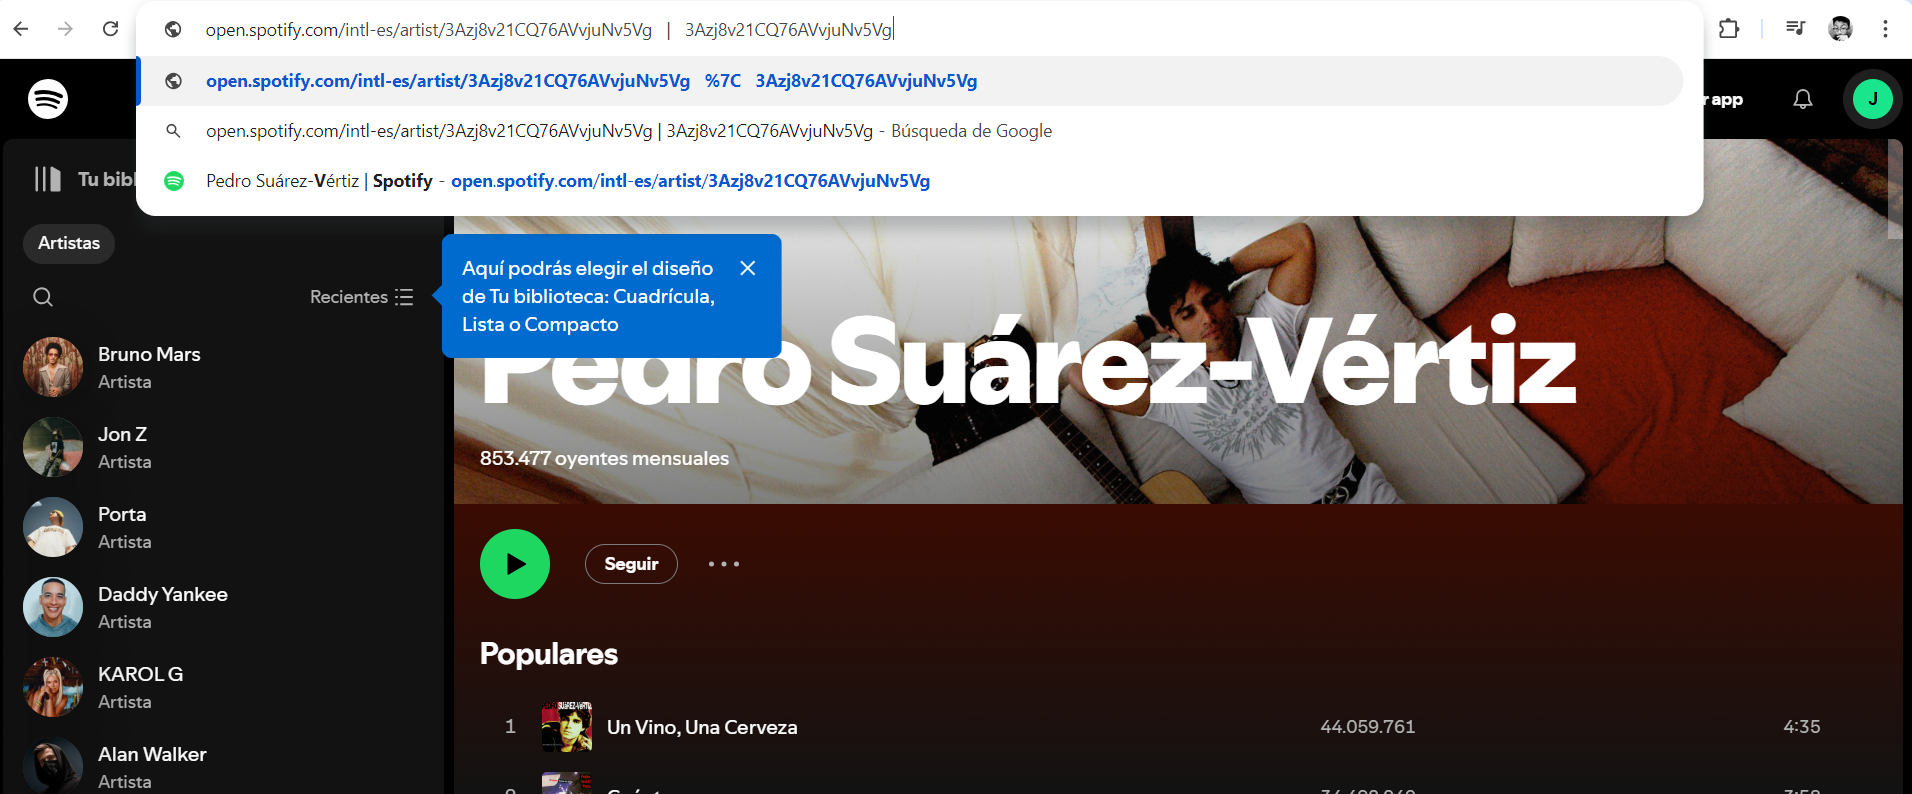

In [7]:
albums = sp.artist_albums(artist_id, album_type='album')
for album in albums['items']:
    print(album['name'])

30 Grandes Éxitos Pedro Suárez-Vertiz
Pedro Suárez Vértiz para Bebés (Vol.1)
Amazonas (Uncut)
Amazonas
Pedro Suárez-Vértiz
Talk Show
Play
Degeneracion Actual
Póntelo en la Lengua
(No Existen) Técnicas para Olvidar


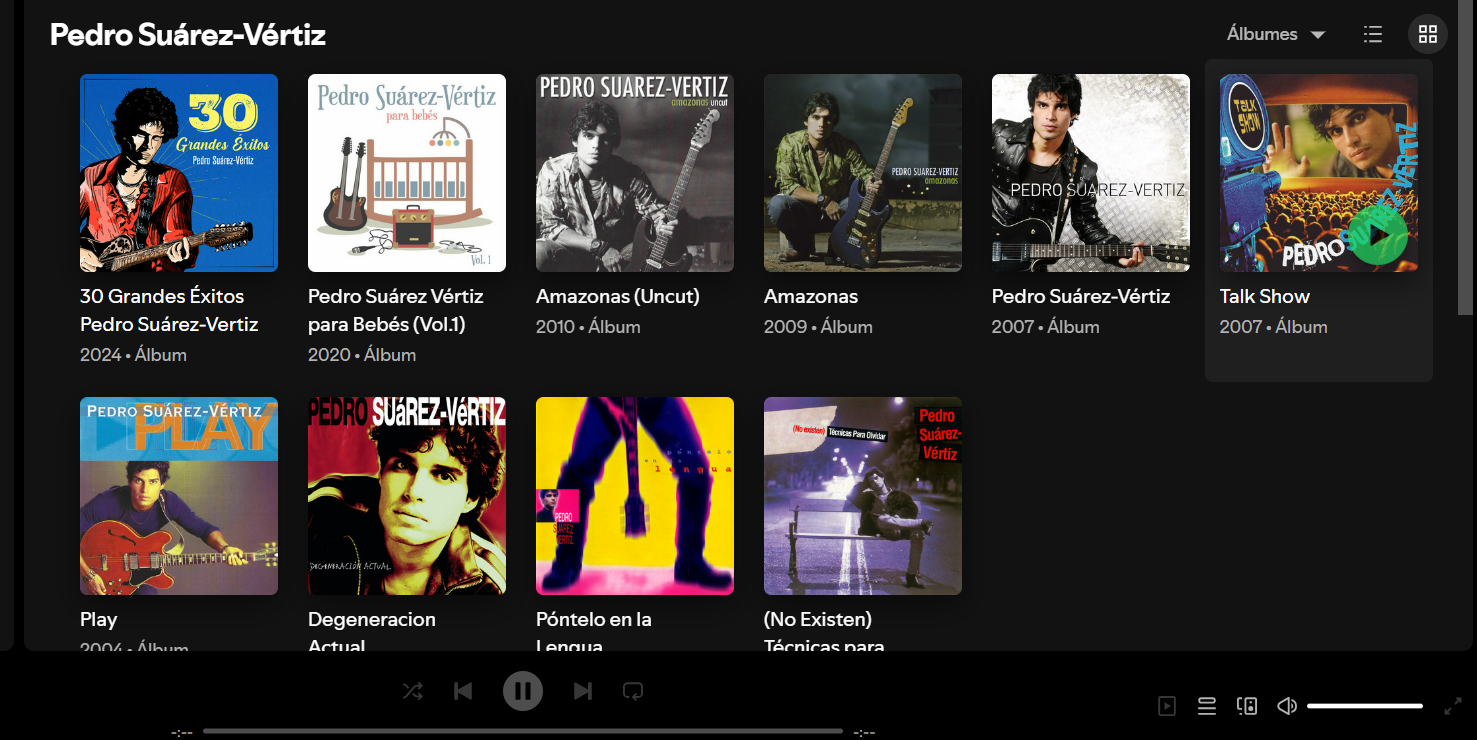

In [13]:
nombre_artista = []
id_artista = []
nombre_cancion = []
id_cancion = []
popularidad_cancion = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2024', type='track', limit=50,offset=i)
    for i, c in enumerate(track_results['tracks']['items']):
        nombre_artista.append(c['artists'][0]['name'])
        id_artista.append(c['artists'][0]['id'])
        nombre_cancion.append(c['name'])
        id_cancion.append(c['id'])
        popularidad_cancion.append(c['popularity'])

In [14]:
track_df = pd.DataFrame({'nombre_artista':nombre_artista, 'nombre_cancion':nombre_cancion, 'id_cancion':id_cancion, 'popularidad_cancion':popularidad_cancion, 'id_artista':id_artista})
print(track_df.shape)
track_df.head()

(1000, 5)


nombre_artista      nombre_cancion              id_cancion  \
0      Chappell Roan    Good Luck, Babe!  0WbMK4wrZ1wFSty9F7FCgu   
1      Billie Eilish  BIRDS OF A FEATHER  6dOtVTDdiauQNBQEDOtlAB   
2          Lady Gaga    Die With A Smile  2plbrEY59IikOBgBGLjaoe   
3  Sabrina Carpenter               Taste  5G2f63n7IPVPPjfNIGih7Q   
4     Kendrick Lamar         Not Like Us  6AI3ezQ4o3HUoP6Dhudph3   

   popularidad_cancion              id_artista  
0                   97  7GlBOeep6PqTfFi59PTUUN  
1                  100  6qqNVTkY8uBg9cP3Jd7DAH  
2                   99  1HY2Jd0NmPuamShAr6KMms  
3                   95  74KM79TiuVKeVCqs8QtB0B  
4                   94  2YZyLoL8N0Wb9xBt1NhZWg

**Paso 2.2: Agregar información sobre los artistas que interpretan las canciones (tracks)**

In [15]:
popularidad_artista = []
generos_artista = []
seguidores_artista = []
for id_a in track_df.id_artista:
  artista = sp.artist(id_a) 
  popularidad_artista.append(artista['popularity'])
  generos_artista.append(artista['genres'])
  seguidores_artista.append(artista['followers']['total'])

In [17]:
track_df = track_df.assign(popularidad_artista=popularidad_artista, generos_artista=generos_artista, seguidores_artista=seguidores_artista)
track_df.head()

nombre_artista      nombre_cancion              id_cancion  \
0      Chappell Roan    Good Luck, Babe!  0WbMK4wrZ1wFSty9F7FCgu   
1      Billie Eilish  BIRDS OF A FEATHER  6dOtVTDdiauQNBQEDOtlAB   
2          Lady Gaga    Die With A Smile  2plbrEY59IikOBgBGLjaoe   
3  Sabrina Carpenter               Taste  5G2f63n7IPVPPjfNIGih7Q   
4     Kendrick Lamar         Not Like Us  6AI3ezQ4o3HUoP6Dhudph3   

   popularidad_cancion              id_artista  popularidad_artista  \
0                   97  7GlBOeep6PqTfFi59PTUUN                   90   
1                  100  6qqNVTkY8uBg9cP3Jd7DAH                   95   
2                   99  1HY2Jd0NmPuamShAr6KMms                   90   
3                   95  74KM79TiuVKeVCqs8QtB0B                   95   
4                   94  2YZyLoL8N0Wb9xBt1NhZWg                   92   

                                     generos_artista  seguidores_artista  
0                            [indie pop, pov: indie]             3022029  
1                                     [art pop, pop]            99430059  
2                          [art pop, dance pop, pop]            31461570  
3                                              [pop]            12440500  
4  [conscious hip hop, hip hop, rap, west coast rap]            32783461

**Paso 3: Obtener variables numéricas de las canciones (tracks)**

In [16]:
variables_cancion = []
for id_c in track_df['id_cancion']:
  af = sp.audio_features(id_c)
  variables_cancion.append(af)

In [18]:
print(variables_cancion[0][0].keys())


dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [19]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [21]:
data_list = []

for variables in variables_cancion:
    if variables is not None:  
        for var in variables:
            if var is not None: 
                print(var) 
                data_list.append(var)

if data_list:
    tf_df = pd.DataFrame(data_list, columns=tf_df.columns)

print(tf_df)

{'danceability': 0.7, 'energy': 0.582, 'key': 11, 'loudness': -5.96, 'mode': 0, 'speechiness': 0.0356, 'acousticness': 0.0502, 'instrumentalness': 0, 'liveness': 0.0881, 'valence': 0.785, 'tempo': 116.712, 'type': 'audio_features', 'id': '0WbMK4wrZ1wFSty9F7FCgu', 'uri': 'spotify:track:0WbMK4wrZ1wFSty9F7FCgu', 'track_href': 'https://api.spotify.com/v1/tracks/0WbMK4wrZ1wFSty9F7FCgu', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0WbMK4wrZ1wFSty9F7FCgu', 'duration_ms': 218424, 'time_signature': 4}
{'danceability': 0.747, 'energy': 0.507, 'key': 2, 'loudness': -10.171, 'mode': 1, 'speechiness': 0.0358, 'acousticness': 0.2, 'instrumentalness': 0.0608, 'liveness': 0.117, 'valence': 0.438, 'tempo': 104.978, 'type': 'audio_features', 'id': '6dOtVTDdiauQNBQEDOtlAB', 'uri': 'spotify:track:6dOtVTDdiauQNBQEDOtlAB', 'track_href': 'https://api.spotify.com/v1/tracks/6dOtVTDdiauQNBQEDOtlAB', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6dOtVTDdiauQNBQEDOtlAB', 'duration_ms':

In [23]:
tf_df.head()


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.700   0.582   11    -5.960     0       0.0356        0.0502   
1         0.747   0.507    2   -10.171     1       0.0358        0.2000   
2         0.521   0.592    6    -7.777     0       0.0304        0.3080   
3         0.674   0.907    3    -4.086     1       0.0640        0.1010   
4         0.898   0.472    1    -7.001     1       0.0776        0.0107   

   instrumentalness  liveness  valence    tempo            type  \
0            0.0000    0.0881    0.785  116.712  audio_features   
1            0.0608    0.1170    0.438  104.978  audio_features   
2            0.0000    0.1220    0.535  157.969  audio_features   
3            0.0000    0.2970    0.721  112.964  audio_features   
4            0.0000    0.1410    0.214  101.061  audio_features   

                       id                                   uri  \
0  0WbMK4wrZ1wFSty9F7FCgu  spotify:track:0WbMK4wrZ1wFSty9F7FCgu   
1  6dOtVTDdiauQNBQEDOtlAB  spotify:track:6dOtVTDdiauQNBQEDOtlAB   
2  2plbrEY59IikOBgBGLjaoe  spotify:track:2plbrEY59IikOBgBGLjaoe   
3  5G2f63n7IPVPPjfNIGih7Q  spotify:track:5G2f63n7IPVPPjfNIGih7Q   
4  6AI3ezQ4o3HUoP6Dhudph3  spotify:track:6AI3ezQ4o3HUoP6Dhudph3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0WbMK4wrZ1wF...   
1  https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...   
2  https://api.spotify.com/v1/tracks/2plbrEY59Iik...   
3  https://api.spotify.com/v1/tracks/5G2f63n7IPVP...   
4  https://api.spotify.com/v1/tracks/6AI3ezQ4o3HU...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/0WbM...       218424   
1  https://api.spotify.com/v1/audio-analysis/6dOt...       210373   
2  https://api.spotify.com/v1/audio-analysis/2plb...       251668   
3  https://api.spotify.com/v1/audio-analysis/5G2f...       157280   
4  https://api.spotify.com/v1/audio-analysis/6AI3...       274192   

   time_signature  
0               4  
1               4  
2               3  
3               4  
4               4

In [24]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df = tf_df.drop(columns=['key','mode','type', 'uri','track_href','analysis_url'])
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_artista       1000 non-null   object
 1   nombre_cancion       1000 non-null   object
 2   id_cancion           1000 non-null   object
 3   popularidad_cancion  1000 non-null   int64 
 4   id_artista           1000 non-null   object
 5   popularidad_artista  1000 non-null   int64 
 6   generos_artista      1000 non-null   object
 7   seguidores_artista   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      999 non-null    float64
 1   energy            999 non-null    float64
 2   loudness          999 non-null    float64
 3   spee

In [25]:
track_df['nombre_artista'] = track_df['nombre_artista'].astype("string")
track_df['nombre_cancion'] = track_df['nombre_cancion'].astype("string")
track_df['id_cancion'] = track_df['id_cancion'].astype("string")
track_df['id_artista'] = track_df['id_artista'].astype("string")
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_artista       1000 non-null   string
 1   nombre_cancion       1000 non-null   string
 2   id_cancion           1000 non-null   string
 3   popularidad_cancion  1000 non-null   int64 
 4   id_artista           1000 non-null   string
 5   popularidad_artista  1000 non-null   int64 
 6   generos_artista      1000 non-null   object
 7   seguidores_artista   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      999 non-null    float64 
 1   energy            999 non-null    float64 
 2   loudness          999 non-null    fl

**Paso 4: Obtener las canciones, artistas y géneros más populares**

**Paso 4.1: Obtener canciones más populares**

In [26]:
top_canciones = track_df.sort_values(by=['popularidad_cancion'], ascending=False)[['nombre_cancion', 'nombre_artista', 'popularidad_cancion']].head(20)
top_canciones.index = np.arange(1, len(top_canciones)+1)
top_canciones

nombre_cancion     nombre_artista  \
1                    BIRDS OF A FEATHER      Billie Eilish   
2                      Die With A Smile          Lady Gaga   
3                      Good Luck, Babe!      Chappell Roan   
4                              Espresso  Sabrina Carpenter   
5                  Please Please Please  Sabrina Carpenter   
6          Si Antes Te Hubiera Conocido            KAROL G   
7                                 Taste  Sabrina Carpenter   
8                           Not Like Us     Kendrick Lamar   
9                                   Who              Jimin   
10                            Big Dawgs        Hanumankind   
11                  MILLION DOLLAR BABY      Tommy Richman   
12        Guess featuring Billie Eilish         Charli xcx   
13                            Gata Only         FloyyMenor   
14            New Woman (feat. ROSALÍA)               LISA   
15  Alibi (with Pabllo Vittar & Yseult)          Sevdaliza   
16                             Bed Chem  Sabrina Carpenter   
17                           Stargazing        Myles Smith   
18                           WILDFLOWER      Billie Eilish   
19          Austin (Boots Stop Workin')              Dasha   
20                                 Move          Adam Port   

    popularidad_cancion  
1                   100  
2                    99  
3                    97  
4                    97  
5                    96  
6                    96  
7                    95  
8                    94  
9                    94  
10                   93  
11                   93  
12                   92  
13                   92  
14                   92  
15                   92  
16                   92  
17                   92  
18                   91  
19                   91  
20                   91

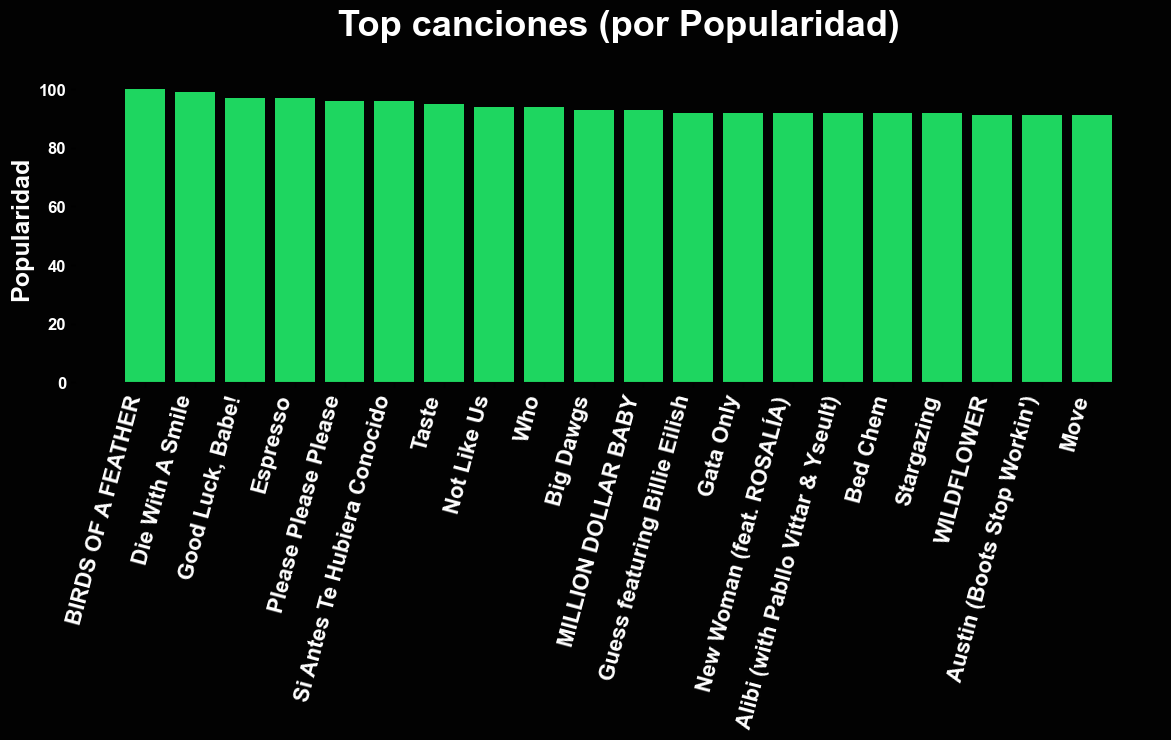

In [27]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_canciones['nombre_cancion'], top_canciones['popularidad_cancion'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Arial'}, size = 18, color='white', weight='bold')
ax.set_title("Top canciones (por Popularidad)", {'fontname':'Arial'}, size = 26, color='white', weight='bold', x=0.5, y=1.1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Arial', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Arial', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

**Paso 4.2: Obtener artistas más populares según número de seguidores**

In [28]:
top_artistas = pd.DataFrame(track_df.sort_values(by=['seguidores_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['seguidores_artista'] = top_artistas['seguidores_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas)+1)
top_artistas

nombre_artista  seguidores_artista popularidad_artista  \
1      Taylor Swift           121433970                 100   
2     Ariana Grande            99731260                  91   
3     Billie Eilish            99430059                  95   
4             Drake            91824203                  96   
5        The Weeknd            90925319                  95   
6            Eminem            90098354                  93   
7   Imagine Dragons            54492490                  88   
8          Coldplay            53271223                  91   
9           KAROL G            50240102                  92   
10      Post Malone            45328102                  93   
11         Dua Lipa            44635942                  88   
12     Shawn Mendes            43202579                  84   
13   Olivia Rodrigo            39611020                  88   
14          Beyoncé            38556097                  86   
15         Anuel AA            37708306                  88   
16         J Balvin            37135831                  87   
17       Juice WRLD            35298517                  87   
18       Katy Perry            34343771                  86   
19       Marshmello            33793455                  84   
20   Camila Cabello            33732074                  82   

                                      generos_artista  
1                                             ['pop']  
2                                             ['pop']  
3                                  ['art pop', 'pop']  
4   ['canadian hip hop', 'canadian pop', 'hip hop'...  
5   ['canadian contemporary r&b', 'canadian pop', ...  
6               ['detroit hip hop', 'hip hop', 'rap']  
7                      ['modern rock', 'pop', 'rock']  
8                           ['permanent wave', 'pop']  
9   ['reggaeton', 'reggaeton colombiano', 'urbano ...  
10           ['dfw rap', 'melodic rap', 'pop', 'rap']  
11                     ['dance pop', 'pop', 'uk pop']  
12               ['canadian pop', 'pop', 'viral pop']  
13                                            ['pop']  
14                                     ['pop', 'r&b']  
15  ['reggaeton', 'reggaeton flow', 'trap boricua'...  
16  ['reggaeton', 'reggaeton colombiano', 'trap la...  
17              ['chicago rap', 'melodic rap', 'rap']  
18                                            ['pop']  
19  ['brostep', 'edm', 'pop', 'progressive electro...  
20                               ['dance pop', 'pop']

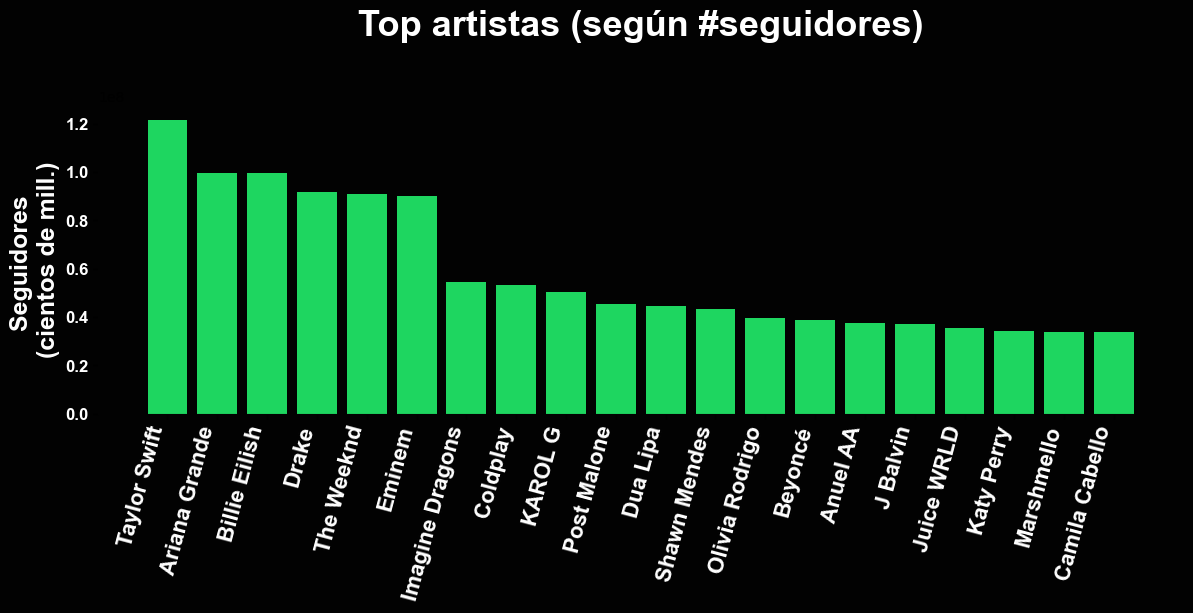

In [29]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_artistas['nombre_artista'], top_artistas['seguidores_artista'], color='#1ED660')
ax.set_ylabel("Seguidores \n(cientos de mill.)", {'fontname':'Arial'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas (según #seguidores)", {'fontname':'Arial'}, size = 26, color='white', weight='bold', x=0.5, y=1.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Arial', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Arial', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

**Paso 4.3: Obtener artistas más populares según popularidad**

In [30]:
top_artistas = pd.DataFrame(track_df.sort_values(by=['popularidad_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['popularidad_artista'] = top_artistas['popularidad_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas)+1)
top_artistas

nombre_artista seguidores_artista  popularidad_artista  \
1        Taylor Swift          121433970                  100   
2               Drake           91824203                   96   
3       Billie Eilish           99430059                   95   
4          The Weeknd           90925319                   95   
5   Sabrina Carpenter           12440500                   95   
6          Peso Pluma           16020308                   93   
7         Post Malone           45328102                   93   
8              Eminem           90098354                   93   
9      Kendrick Lamar           32783461                   92   
10               Feid           13691078                   92   
11            KAROL G           50240102                   92   
12           Coldplay           53271223                   91   
13         Zach Bryan            5050464                   91   
14             Future           18509265                   91   
15      Ariana Grande           99731260                   91   
16      Morgan Wallen           10610365                   91   
17       David Guetta           26169236                   90   
18        Linkin Park           26649988                   90   
19                SZA           23013017                   90   
20          Lady Gaga           31461570                   90   

                                      generos_artista  
1                                             ['pop']  
2   ['canadian hip hop', 'canadian pop', 'hip hop'...  
3                                  ['art pop', 'pop']  
4   ['canadian contemporary r&b', 'canadian pop', ...  
5                                             ['pop']  
6               ['corridos tumbados', 'sad sierreno']  
7            ['dfw rap', 'melodic rap', 'pop', 'rap']  
8               ['detroit hip hop', 'hip hop', 'rap']  
9   ['conscious hip hop', 'hip hop', 'rap', 'west ...  
10  ['colombian pop', 'pop reggaeton', 'reggaeton'...  
11  ['reggaeton', 'reggaeton colombiano', 'urbano ...  
12                          ['permanent wave', 'pop']  
13                       ['classic oklahoma country']  
14  ['atl hip hop', 'hip hop', 'rap', 'southern hi...  
15                                            ['pop']  
16                           ['contemporary country']  
17  ['big room', 'dance pop', 'edm', 'pop', 'pop d...  
18  ['alternative metal', 'nu metal', 'post-grunge...  
19                              ['pop', 'r&b', 'rap']  
20                    ['art pop', 'dance pop', 'pop']

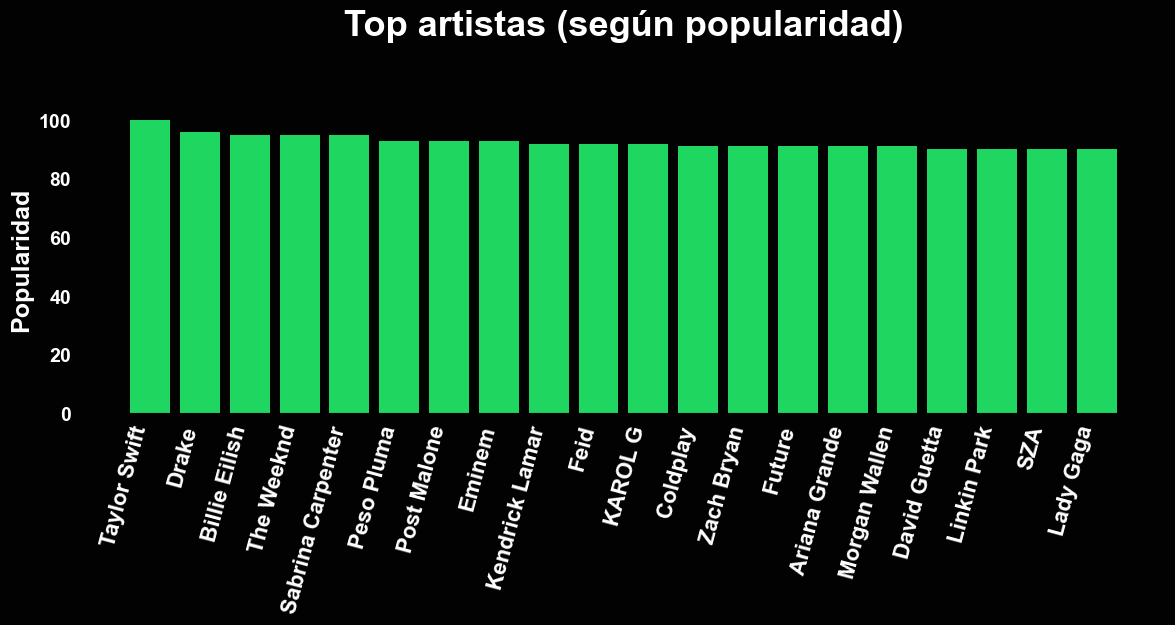

In [31]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_artistas['nombre_artista'], top_artistas['popularidad_artista'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Arial'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas (según popularidad)", {'fontname':'Arial'}, size = 26, color='white', weight='bold', x=0.5, y=1.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Arial', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Arial', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

**Paso 4.4: Obtener los géneros más populares**

In [32]:
top_generos = pd.Series([x for _list in track_df['generos_artista'] for x in _list]).value_counts().head(20).to_frame().reset_index()
top_generos = top_generos.rename(columns = {'index':'generos', 'count':'frecuencia'})
top_generos.index = np.arange(1, len(top_generos)+1)
top_generos

generos  frecuencia
1                     pop         230
2                     rap         191
3                 hip hop          85
4      modern country pop          77
5             melodic rap          71
6            sad sierreno          61
7                 corrido          52
8                 dfw rap          47
9         detroit hip hop          45
10   contemporary country          41
11             pov: indie          40
12      corridos tumbados          37
13                   trap          37
14  singer-songwriter pop          32
15            atl hip hop          31
16                art pop          30
17               sierreno          28
18          urbano latino          27
19                  k-pop          26
20                 uk pop          25

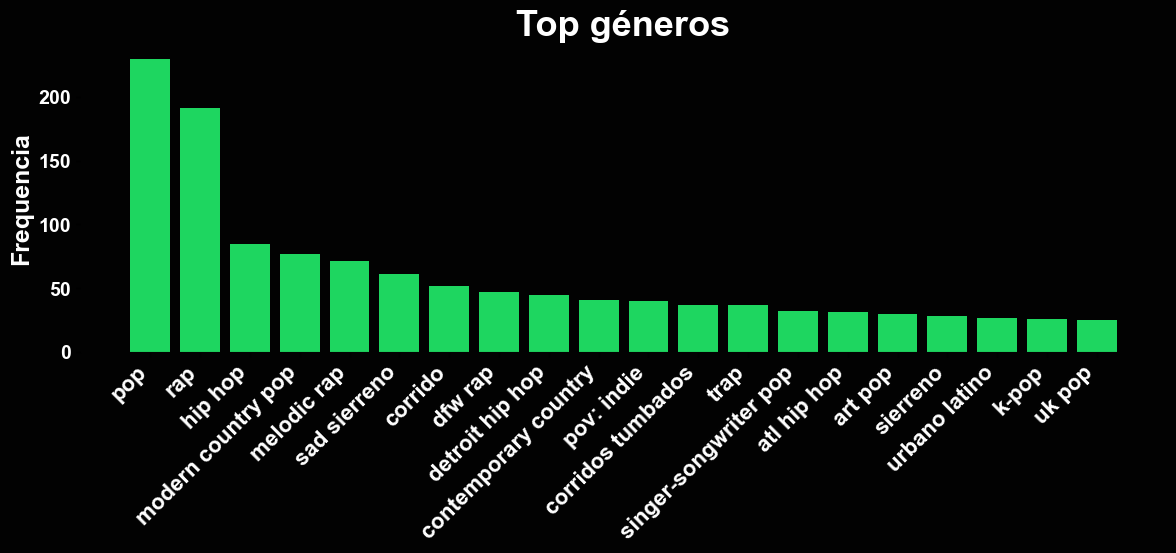

In [33]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_generos['generos'], top_generos['frecuencia'], color='#1ED660')
ax.set_ylabel("Frequencia", {'fontname':'Arial'}, size = 18, color='white', weight='bold')
ax.set_title("Top géneros", {'fontname':'Arial'}, size = 26, color='white', weight='bold', x=0.5, y=1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Arial', rotation=45, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Arial', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

**Paso 5: Obtener artistas y canciones más populares (por seguidores) por género más popular**

**Paso 5.1: Obtener artistas más populares (por seguidores) por género más popular**

In [34]:
by_artista_pop = pd.DataFrame(track_df.sort_values(by=['popularidad_artista'],ascending=False)[['popularidad_artista','nombre_artista','generos_artista','id_artista']])
by_artista_pop.astype(str).drop_duplicates().head(20)
by_artista_pop
top_artistas_por_genero = []
for genero in top_generos['generos'].to_list():
  for index, row in by_artista_pop.iterrows():
    if genero in row['generos_artista']:
      top_artistas_por_genero.append({'nombre_artista':row['nombre_artista'], 'popularidad_artista':row['popularidad_artista'],'generos':genero})
      break
top_artistas_por_genero = pd.json_normalize(top_artistas_por_genero)
top_artistas_por_genero = top_artistas_por_genero.merge(top_generos, on='generos', how='left')
top_artistas_por_genero

nombre_artista  popularidad_artista                generos  frecuencia
0    Taylor Swift                  100                    pop         230
1           Drake                   96                    rap         191
2           Drake                   96                hip hop          85
3      Jelly Roll                   82     modern country pop          77
4     Post Malone                   93            melodic rap          71
5      Peso Pluma                   93           sad sierreno          61
6   Natanael Cano                   89                corrido          52
7     Post Malone                   93                dfw rap          47
8          Eminem                   93        detroit hip hop          45
9   Morgan Wallen                   91   contemporary country          41
10  Chappell Roan                   90             pov: indie          40
11     Peso Pluma                   93      corridos tumbados          37
12         Future                   91                   trap          37
13     Noah Kahan                   87  singer-songwriter pop          32
14         Future                   91            atl hip hop          31
15  Billie Eilish                   95                art pop          30
16  Natanael Cano                   89               sierreno          28
17           Feid                   92          urbano latino          27
18          Jimin                   89                  k-pop          26
19       Dua Lipa                   88                 uk pop          25

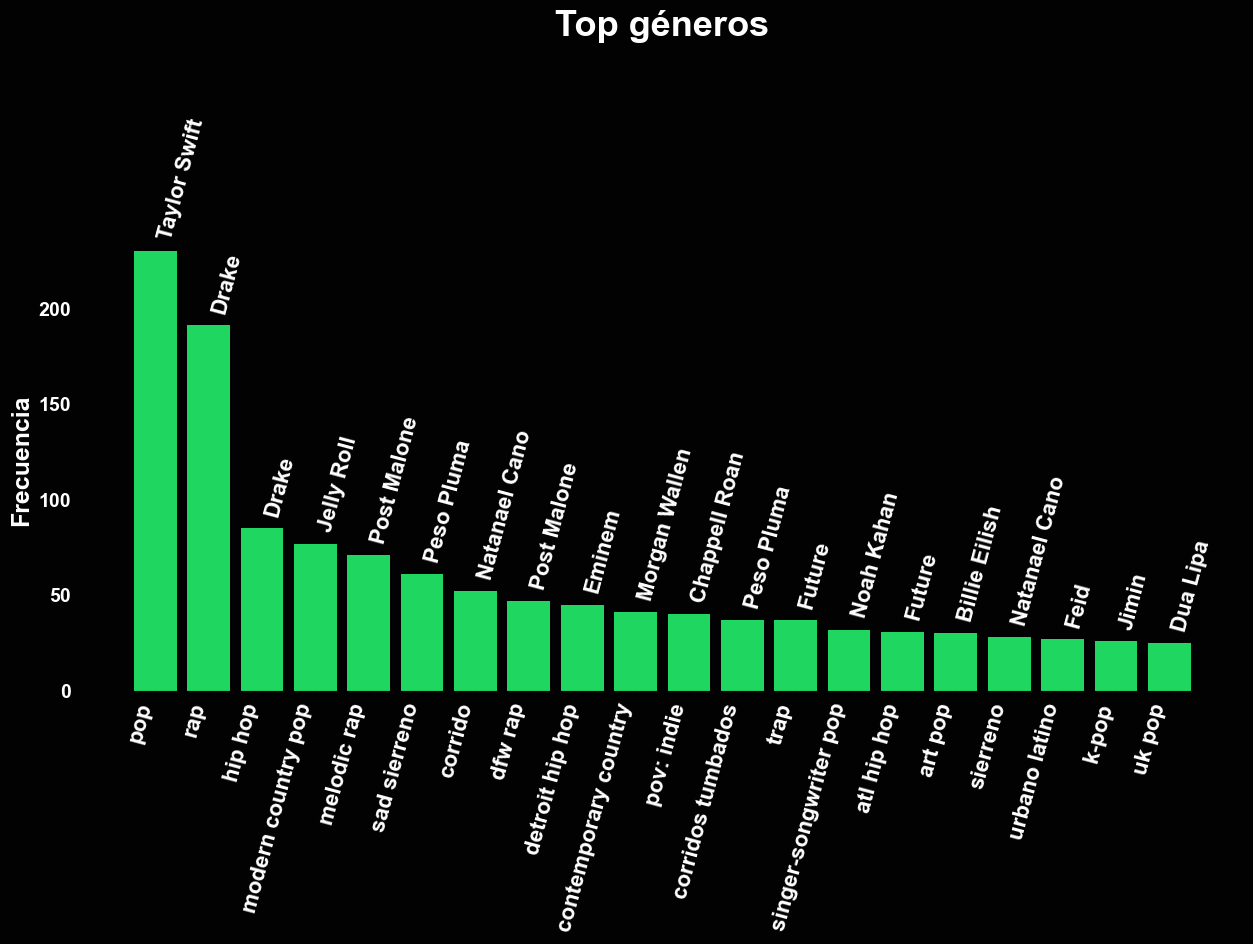

In [35]:
plt.figure(figsize=(15,6), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_artistas_por_genero['generos'], top_artistas_por_genero['frecuencia'], color='#1ED660')
ax.set_ylabel("Frecuencia", {'fontname':'Arial'}, size = 18, color='white', weight='bold')
ax.set_title("Top géneros", {'fontname':'Arial'}, size = 26, color='white', weight='bold', x=0.5, y=1.4)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Arial', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Arial', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')

for rect, label in zip(ax.patches, top_artistas_por_genero['nombre_artista'].to_list()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="left", va="bottom", fontname='Arial', color='white', size=16, rotation=75, weight='bold')
plt.show()

**Paso 5.2: Obtener canciones más populares (por seguidores) por género más popular**

In [36]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['popularidad_cancion'],ascending=False)[['popularidad_cancion','nombre_cancion','nombre_artista','generos_artista','id_cancion']])
top_canciones_por_genero = []
for genre in top_generos['generos'].to_list():
  for index, row in by_track_pop.iterrows():
    if genre in row['generos_artista']:
      top_canciones_por_genero.append({'nombre_cancion':row['nombre_cancion'], 'popularidad_cancion':row['popularidad_cancion'], 'generos':genre})
      break
top_canciones_por_genero = pd.json_normalize(top_canciones_por_genero)
top_canciones_por_genero = top_canciones_por_genero.merge(top_generos, on='generos', how='left')
top_canciones_por_genero

nombre_cancion  popularidad_cancion  \
0                      BIRDS OF A FEATHER                  100   
1                             Not Like Us                   94   
2                             Not Like Us                   94   
3                      A Bar Song (Tipsy)                   90   
4   I Had Some Help (Feat. Morgan Wallen)                   90   
5                        Si No Quieres No                   88   
6                        Si No Quieres No                   88   
7   I Had Some Help (Feat. Morgan Wallen)                   90   
8                                 Houdini                   87   
9                          Lies Lies Lies                   86   
10                       Good Luck, Babe!                   97   
11                                    NEL                   88   
12                              Like That                   87   
13                             Stargazing                   92   
14                              Like That                   87   
15                     BIRDS OF A FEATHER                  100   
16                       Si No Quieres No                   88   
17           Si Antes Te Hubiera Conocido                   96   
18                                    Who                   94   
19          Guess featuring Billie Eilish                   92   

                  generos  frecuencia  
0                     pop         230  
1                     rap         191  
2                 hip hop          85  
3      modern country pop          77  
4             melodic rap          71  
5            sad sierreno          61  
6                 corrido          52  
7                 dfw rap          47  
8         detroit hip hop          45  
9    contemporary country          41  
10             pov: indie          40  
11      corridos tumbados          37  
12                   trap          37  
13  singer-songwriter pop          32  
14            atl hip hop          31  
15                art pop          30  
16               sierreno          28  
17          urbano latino          27  
18                  k-pop          26  
19                 uk pop          25

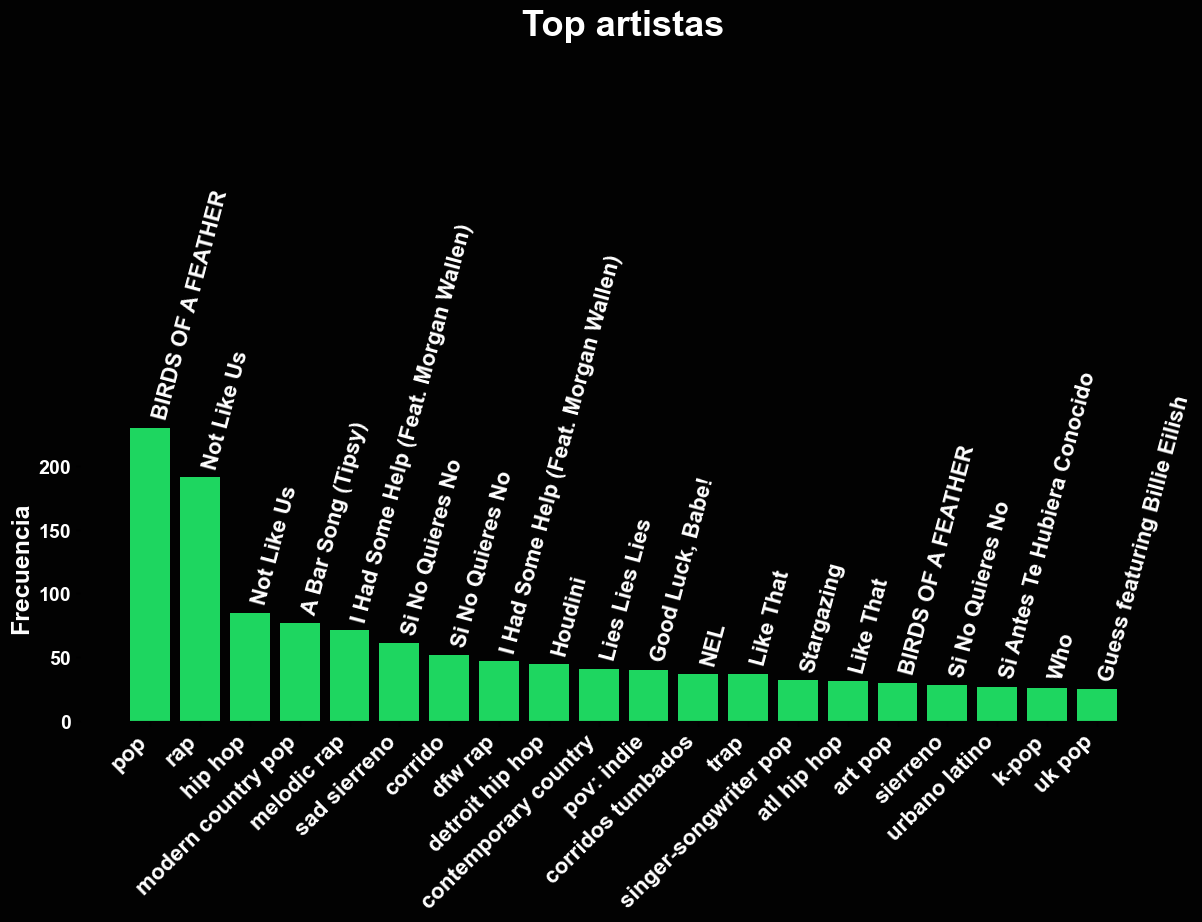

In [37]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_canciones_por_genero['generos'], top_canciones_por_genero['frecuencia'], color='#1ED660')
ax.set_ylabel("Frecuencia", {'fontname':'Arial'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas", {'fontname':'Arial'}, size = 26, color='white', weight='bold', x=0.5, y=2.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Arial', rotation=45, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Arial', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')

for rect, label in zip(ax.patches, top_canciones_por_genero['nombre_cancion'].to_list()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="left", va="bottom", fontname='Arial', color='white', size=16, rotation=75, weight='bold')

plt.show()

**Paso 6: Radar chart usando las variables de las canciones**

In [39]:
# Crear un dataframe con las variables de las top 100 canciones
var_canc_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_var = pd.DataFrame(columns=var_canc_cols)
for i, track in by_track_pop[:100].iterrows():
    variables = tf_df[tf_df['id'] == track['id_cancion']]
    top_100_var = pd.concat([top_100_var, variables], ignore_index=True)

top_100_var = top_100_var[var_canc_cols]
mean_vals = pd.DataFrame(columns=var_canc_cols)

mean_vals = pd.concat([mean_vals, pd.DataFrame([top_100_var.mean()], columns=var_canc_cols)], ignore_index=True)
mean_vals = pd.concat([mean_vals, pd.DataFrame([tf_df[var_canc_cols].mean()], columns=var_canc_cols)], ignore_index=True)

mean_vals

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23272\1918853358.py:6: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23272\1918853358.py:11: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



danceability    energy  speechiness  acousticness  instrumentalness  \
0      0.678070  0.648490     0.072713      0.216874          0.040866   
1      0.644054  0.657049     0.096835      0.236585          0.037448   

   liveness   valence  
0  0.144851  0.552265  
1  0.185170  0.485579

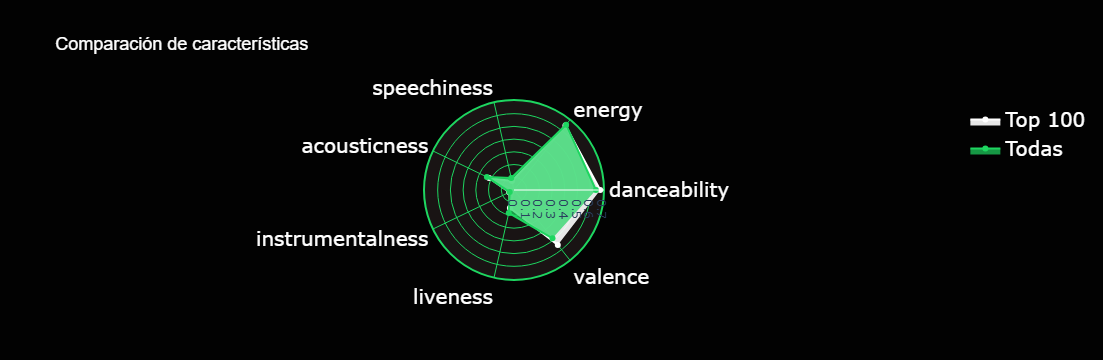

In [40]:
fig = go.Figure(data=[go.Scatterpolar(r=mean_vals.iloc[0], theta=var_canc_cols, fill='toself', name='Top 100', line_color='#FFFFFF', fillcolor='rgba(255,255,255,0.9)'),
                      go.Scatterpolar(r=mean_vals.iloc[1], theta=var_canc_cols, fill='toself', name='Todas', line_color='rgb(30,214,96)', fillcolor='rgba(30,214,96,0.7)')],
                layout=go.Layout(title=go.layout.Title(text='Comparación de características'),
                                 polar={'radialaxis': {'visible': True}},
                                 showlegend=True, plot_bgcolor='#020202', paper_bgcolor='#020202'))
fig.update_layout(title=dict(text='Comparación de características',
                             font=dict(family="sans-serif", 
                                       size = 18,
                                       color='#FFFFFF')),
                 legend=dict(font=dict(size=20, color='#FFFFFF'))) 
fig.update_xaxes(title_font_color='#FFFFFF')
fig.update_yaxes(title_font_color='#FFFFFF') 
fig.update_polars(angularaxis_color='#FFFFFF', angularaxis_tickfont_size=20, angularaxis_linecolor='#1ED660', angularaxis_linewidth=2, angularaxis_gridcolor='#1ED660', angularaxis_tickcolor='#1DB954',
                 bgcolor='rgba(25,20,20,1)', radialaxis_gridcolor='#1ED660')
fig.show() 

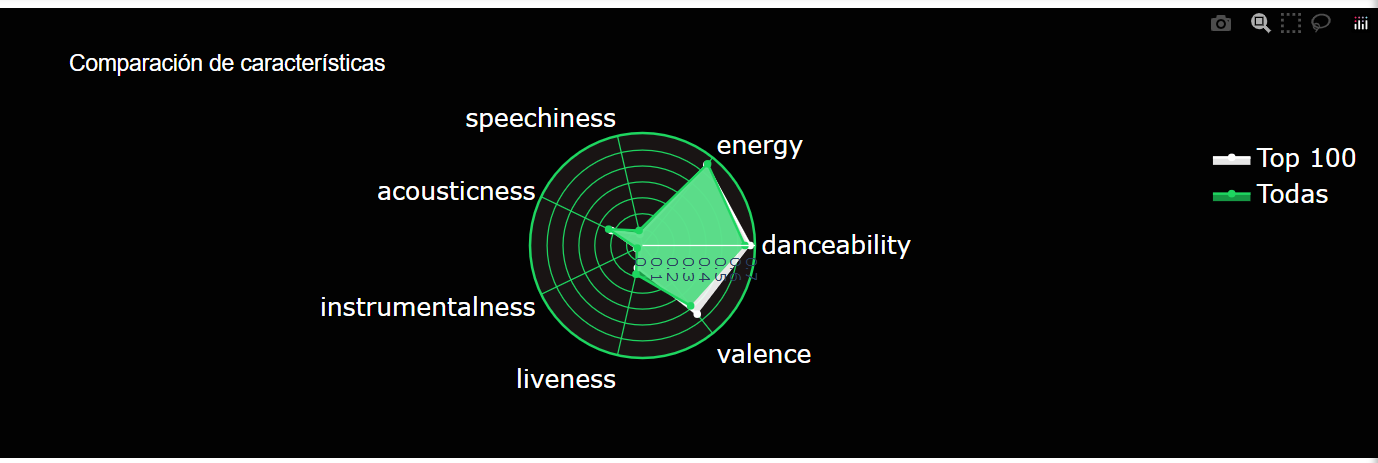